In [31]:
import pandas as pd

covid_file = "Folkhalsomyndigheten_Covid19.xlsx"

veckodata_riket_df = pd.read_excel(covid_file, sheet_name = "Veckodata Riket")

In [32]:
veckodata_riket_df.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [33]:
veckodata_riket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [34]:
veckodata_riket_df[veckodata_riket_df.isna().any(axis = 1)]

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv


In [35]:
veckodata_riket_df[veckodata_riket_df.isnull().any(axis = 1)]

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv


In [36]:
# converting columns år and veckonummer with astype() before concatenating
veckodata_riket_df["Vecka"] = veckodata_riket_df["år"].astype(str) + "v" + veckodata_riket_df["veckonummer"].astype(str)

veckodata_riket_df["Vecka"].head()

0     2020v6
1     2020v7
2     2020v8
3     2020v9
4    2020v10
Name: Vecka, dtype: object

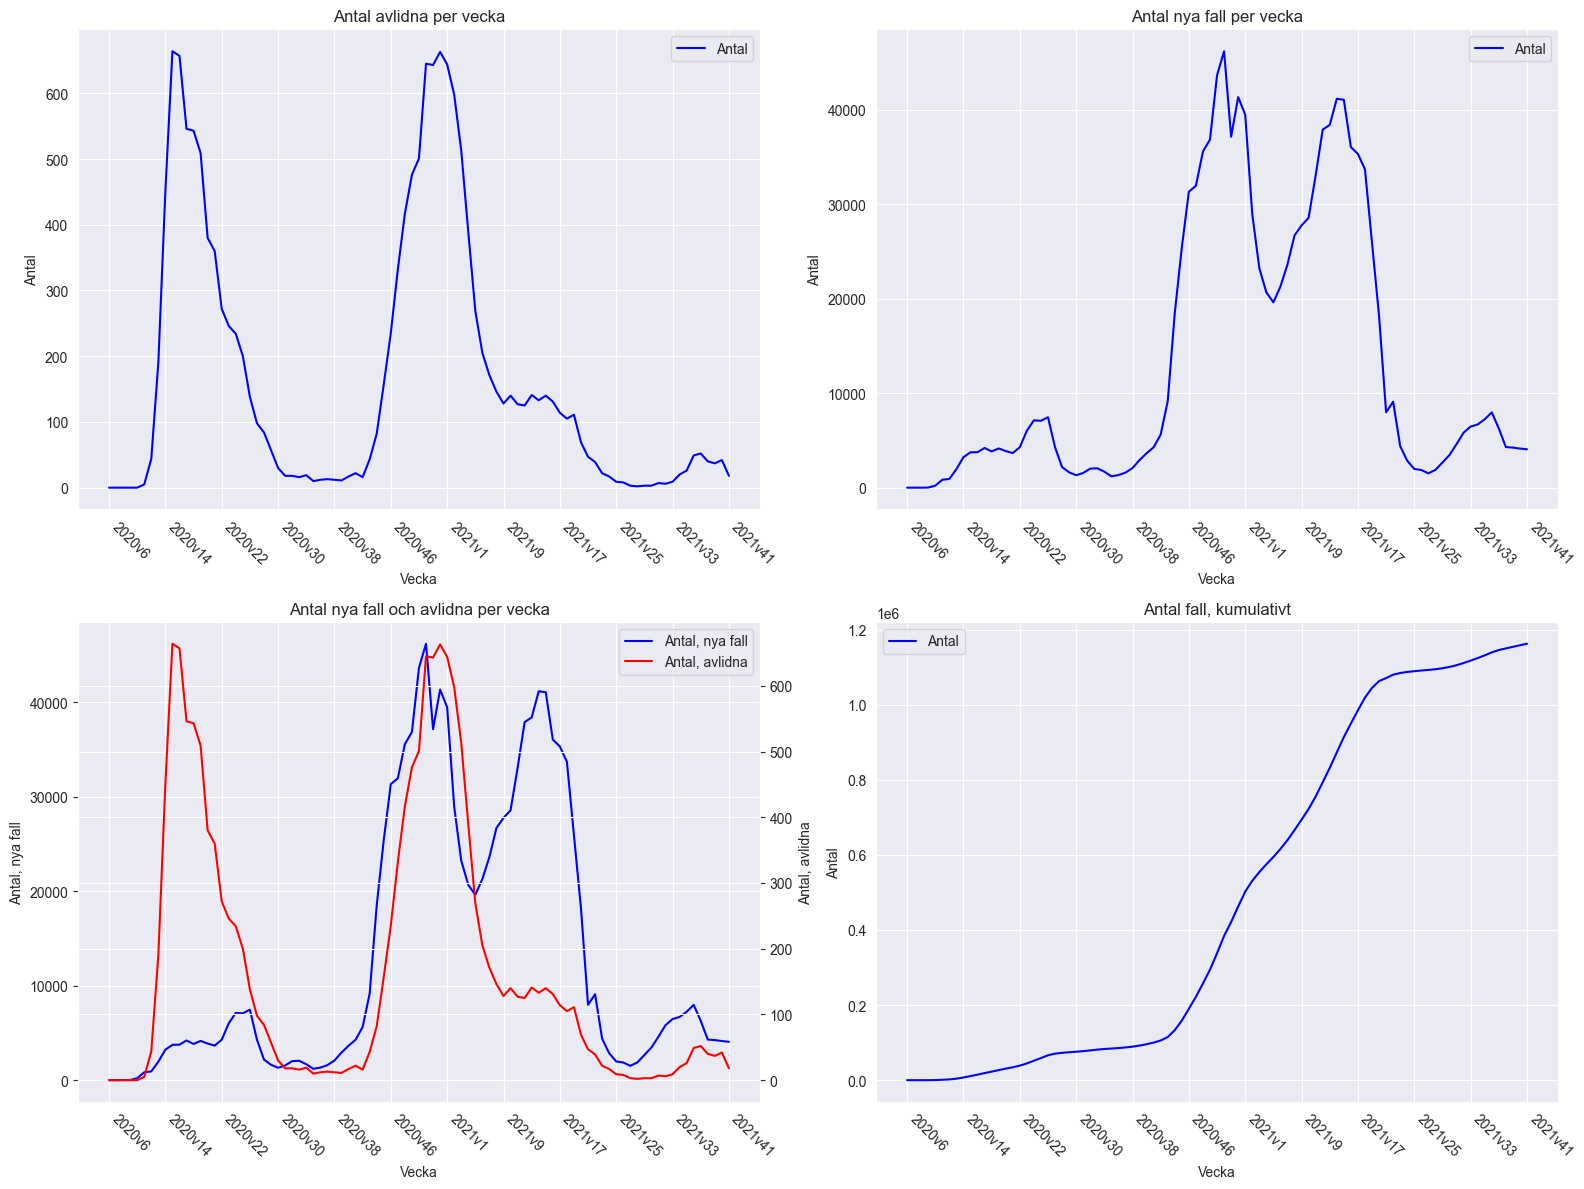

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from math import ceil
import numpy as np

def subplot_size(n):
    """Returns a tuple with two numbers when multiplied is large enough to fit the number of graphs"""
    return (round(n ** 0.5), ceil(n ** 0.5))

def sns_plotter(df, plotdicts):
    """Takes a dataframe and a list of dicts of what to plot, plots everything in the same figure
    and saves it as a png-file.

    The dict can be of any length even though it will print some empty graphs if the number
    is not a n x m rectangle. A "colspan" might solve of this problem.

    Required keys and values of a plot dict:
        "title" - Subplot title
        "y" - List of columns on the y - axis
        "y_labels" - List of y - axis labels
    Optional:
        "x" - Defaults to "Vecka" if not in dict
    """

    gridsize = subplot_size(len(plotdicts))

    colors = list("brgy")
    
    # set_tyle won't work the first time you run the script and I haven't figured out why that is.
    sns.set_style("darkgrid")

    fig_sns, ax = plt.subplots(gridsize[0], gridsize[1], figsize = (16, gridsize[0] * 6), dpi = 100)
    
    # if the user wants to plot just a single graph, the ax will not be an iterable. This will make it 
    # one, else it will flatten it to maket it easier to handle.
    if not isinstance(ax, np.ndarray):
        ax = [ax, ]
    else:
        ax = ax.flatten()

    # convert the ax list to a 2d list to be able to append twinx-plots
    ax = [[i] for i in ax]

    for i, plot in enumerate(plotdicts):

        # default the x axis to column "Vecka" from the dataframe
        x_plot = "Vecka" if "x" not in plot else plot["x"]

        # we don't want to print every x - value as a x - label, this adjust how large the steps should be
        tickjump = df[x_plot].count() // 10

        for j, subplot in enumerate(plot["y"]):
            
            # if there are multiple y columns to plot in the same ax, this appends a twin to the ax
            if j > 0:
                ax[i].append(ax[i][0].twinx())

            sns.lineplot(
                data = df, 
                x = x_plot, 
                y = plot["y"][j], 
                ax = ax[i][j], 
                color = colors[j], 
                label = plot["y_labels"][j], 
                legend = False
            )

            ax[i][j].set(ylabel = plot["y_labels"][j])

        ax[i][0].set(title = plot["title"], xticks = df[x_plot][:: tickjump])
        ax[i][0].set_xticklabels(df[x_plot][:: tickjump], rotation = -45, ha = "left")

        # get the handles and labels of the graphing objects to make a legend
        # the code is heavily inspired from this: https://stackoverflow.com/questions/14344063/single-legend-for-multiple-axes
        handles, labels = [], []
        for item in ax[i]:
            h, l = item.get_legend_handles_labels()
            handles.append(h[0])
            labels.append(l[0])

        ax[i][0].legend(handles, labels)

    # this makes the layout look better
    fig_sns.tight_layout()

    filename = f"{len(plotdicts)}_graph"
    filename += "s" if len(plotdicts) > 1 else ""

    plt.savefig(f"./Visualiseringar/{filename}.png", bbox_inches = "tight")

def px_plotter(df, plotdicts):
    """Takes a dataframe and a list of dicts of what to plot anda plots each one into a 
    separete html file. The list can be of any length.

    Required keys and values of a plot dict:
        "title" - Subplot title
        "y" - List of columns on the y - axis
        "y_labels" - List of y - axis labels
    Optional:
        "x" - Defaults to "Vecka" if not in dict
    """

    for plot in plotdicts:

        # default the x axis to column "Vecka" from the dataframe
        x_plot = "Vecka" if "x" not in plot else plot["x"]
        
        # since i couldn't find a simple way to make a two-x-axis plot in plotly express
        # I decided to make the scale logaritmic if there are more than one column to plot on
        # the y axis.
        ylog = True if len(plot["y"]) > 1 else False

        fig_px = px.line(
            df, 
            x = x_plot, 
            y = plot["y"],
            labels = {"value": plot["y_labels"][0], "variable": "Variabel"},
            title = plot["title"],
            log_y = ylog
        )

        # I like a simple design without a lot of redundant information, so after
        # trying out a few different hovermodes I decided to stuck with this one
        fig_px.update_traces(mode = "lines", hovertemplate = None)
        fig_px.update_layout(hovermode = "x")

        filename = plot["title"].replace(",", "").replace(" ", "_").lower()
        fig_px.write_html(f"./Visualiseringar/{filename}.html")


to_plot = [{
        "title": "Antal avlidna per vecka",
        "y": ["Antal_avlidna_vecka"],
        "y_labels": ["Antal"]
    },{
        "title": "Antal nya fall per vecka",
        "y": ["Antal_fall_vecka"],
        "y_labels": ["Antal"]
    },{
        "title": "Antal nya fall och avlidna per vecka",
        "y": ["Antal_fall_vecka", "Antal_avlidna_vecka"],
        "y_labels": ["Antal, nya fall", "Antal, avlidna"]
    },{
        "title": "Antal fall, kumulativt",
        "y": ["Kum_antal_fall"],
        "y_labels": ["Antal"]
}]

sns_plotter(veckodata_riket_df, to_plot)
px_plotter(veckodata_riket_df, to_plot)